

## Describing Sales Data with `numpy`



---

Run the cell below to load the required packages and set up plotting in the notebook!

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns

%matplotlib inline

## Loading CSV files with python

---

For this lab you will be using a truncated version of some sales data.

The csv has about 200 rows of data and four columns. The relative path to `sales_info.csv` is provided below.


Let's take a look at the `csv` module we imported. The csv module’s reader and writer objects read and write sequences. The following python code demonstrates a process for loading data from a CSV file and (in this case) appending each row to a list.


```python
import csv
print 'Opening File. Data: '
csv_rows = []
with open('./datasets/sales_info.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
f.close()
print 'file closed'   # Always remember to close the file after writing to it!
```

The first argument to `csv.reader` is the string path to the file. The second argument specifies the "mode" for the open file object:
- `'r'` - Read (Default)
- `'w'` - Write
- `'a'` - Append;  Adds additional modifications to the end.  Unable to edit current contents.
- `'b'` - Binary (used when working with a binary file, i.e. 'rb', for reading a binary file)
- `'U'` - Opens text in Universal Newline mode.  As '\r', '\n', and '\r\n' all indicate a newline depending on which language the file was written in, Universal Newline Mode will read '\r', '\n', and '\r\n' as Python's '\n'.

In [2]:
sales_csv_path = '../datasets/sales_info.csv'

### 1. Loading the data

Set up an empty list called ```rows```.

Using the pattern for loading csvs we learned earlier, add all of the rows in the csv file to the rows list.

For your reference, the pattern is:
```python
with open(my_csv_path, 'r') as f:
    reader = csv.reader(f)
    ...
```

Beyond this, adding the rows in the csv file to the ```rows``` variable is up to you.

In [3]:
rows = []

with open(sales_csv_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

print(rows)

[['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales'], ['18.4207604861', '93.8022814583', '337166.53', '337804.05'], ['4.77650991918', '21.0824246877', '22351.86', '21736.63'], ['16.6024006077', '93.6124943024', '277764.46', '306942.27'], ['4.29611149826', '16.8247038328', '16805.11', '9307.75'], ['8.15602328201', '35.0114570034', '54411.42', '58939.9'], ['5.00512242518', '31.8774372328', '255939.81', '332979.03'], ['14.60675', '76.5189730216', '319020.69', '302592.88'], ['4.45646649485', '19.3373453608', '45340.33', '55315.23'], ['5.04752965097', '26.142470349', '57849.23', '42398.57'], ['5.38807023767', '22.4270237673', '51031.04', '56241.57'], ['9.34734863474', '41.892132964', '68657.91', '3536.14'], ['10.9303977273', '66.4030492424', '4151.93', '137416.93'], ['6.27020860495', '47.8693242069', '121837.56', '158476.55'], ['12.3959191176', '86.7601504011', '146725.31', '125731.51'], ['4.55771189614', '22.9481762576', '119287.76', '21834.49'], ['4.20012242627', '18.70605453

### 2. Separate header and data

The header of the csv is contained in the first index of the ```rows``` variable, as it is the first row in the csv file. 

Use python indexing to create two new variables: ```header``` which contains the 4 column names, and ```data``` which contains the list of lists, each sub-list representing a row from the csv.

Lastly, print ```header``` to see the names of the columns.

In [4]:
header = rows[0]
data = rows[1:]
print(header)

['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales']


### 3. Create a dictionary with the data

Use loops or list comprehensions to create a dictionary called ```sales_data```, where the keys of the dictionary are the column names, and the values of the dictionary are lists of the data points of the column corresponding to that column name.

In [5]:
sales_data = {}

for index, column_name in enumerate(header):
    sales_data[column_name] = []
    for row in data:
        sales_data[column_name].append(row[index])

**3.A Print out the first 10 items of the 'volume_sold' column.**

In [6]:
sales_data['volume_sold'][0:10]

['18.4207604861',
 '4.77650991918',
 '16.6024006077',
 '4.29611149826',
 '8.15602328201',
 '5.00512242518',
 '14.60675',
 '4.45646649485',
 '5.04752965097',
 '5.38807023767']

### 4. Convert data from string to float

As you can see, the data is still in string format (which is how it is read in from the csv). For each key:value pair in our ```sales_data``` dictionary, convert the values (column data) from string values to float values.

In [7]:
for name, col in list(sales_data.items()):
    col = [float(x) for x in col]
    sales_data[name] = col
    

### 5. Write function to print summary statistics

Now write a function to print out summary statistics for the data.

Your function should:

- Accept two arguments: the column name and the data that column is associated with.
- Print out information, clearly labeling each item when you print it:
    1. Print out the column name
    2. Print the mean of that column using `np.mean()`
    3. Print out the median of that column using `np.median()`
    4. Print out the mode of that column **rounded** using `stats.mode()`
    5. Print out the variance of that column using `np.var()`
    6. Print out the standard deviation of that column using `np.std()`
    
Remember, in order to print the desired output, you will need to convert the numeric data from this function to strings by wrapping them in the `str()` function.

In [8]:
def summary_statistics(column, data):
    X = data[column]
    print('COLUMN: ' + column)
    print('mean: ' + str(np.mean(X)))
    print('median: ' + str(np.median(X)))
    print('mode: ' + str(stats.mode([round(d) for d in X])))
    print('variance: ' + str(np.var(X)))
    print('standard deviation: ' + str(np.std(X)))


**5.A Using your function, print the summary statistics for `volume_sold`.**

In [9]:
summary_statistics('volume_sold', sales_data)

COLUMN: volume_sold
mean: 10.0186840789888
median: 8.16634551564
mode: ModeResult(mode=array([8]), count=array([28]))
variance: 84.12996520049938
standard deviation: 9.172238832504275


**5.B Using your function, print the summary statistics for `2015_margin`.**

In [10]:
summary_statistics('2015_margin', sales_data)

COLUMN: 2015_margin
mean: 46.8588951379235
median: 36.5621438181
mode: ModeResult(mode=array([35]), count=array([9]))
variance: 2016.0616629583997
standard deviation: 44.90057530765502


**5.C Using your function, print the summary statistics for `2015_q1_sales`.**

In [11]:
summary_statistics('2015_q1_sales', sales_data)

COLUMN: 2015_q1_sales
mean: 154631.66820000001
median: 104199.41
mode: ModeResult(mode=array([4152]), count=array([1]))
variance: 47430301462.331505
standard deviation: 217784.98906566427


**5.D Using your function, print the summary statistics for `2016_q1_sales`.**

In [12]:
summary_statistics('2016_q1_sales', sales_data)

COLUMN: 2016_q1_sales
mean: 154699.17875
median: 103207.20000000001
mode: ModeResult(mode=array([3536]), count=array([1]))
variance: 47139411653.44524
standard deviation: 217116.12481215032


### 6. Plot the distributions

We've provided a plotting function below called ```distribution_plotter()```. It takes two arguments, the name of the column and the data associated with that column.

In individual cells, plot the distributions for each of the four columns. Does the data appear skewed? Symmetrical? If skewed, what would be your hypothesis for why?

In [13]:
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

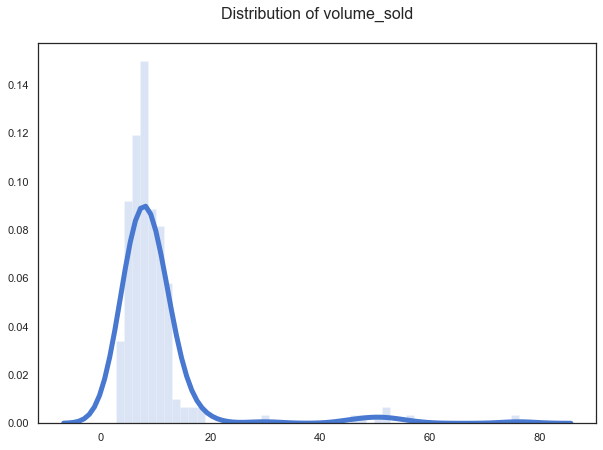

In [14]:
distribution_plotter('volume_sold', sales_data)

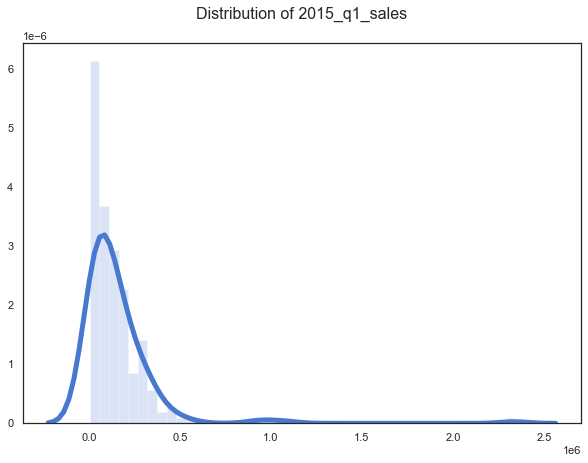

In [15]:
distribution_plotter('2015_q1_sales', sales_data)

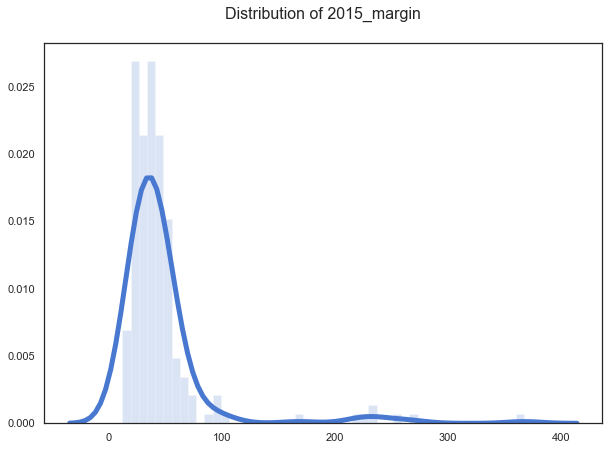

In [16]:
distribution_plotter('2015_margin', sales_data)

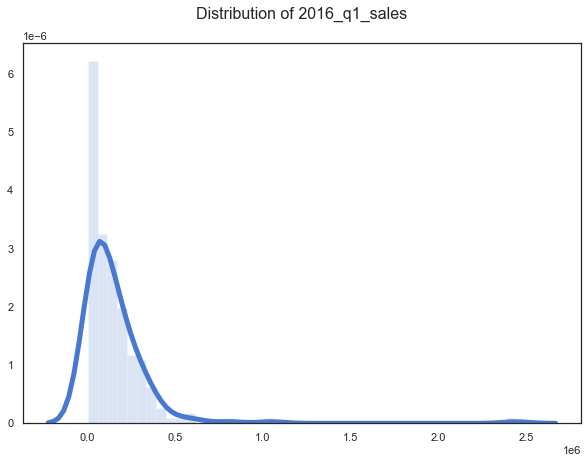

In [17]:
distribution_plotter('2016_q1_sales', sales_data)

---

### An aside on the plotting function...

Check out this example:

```python
   1.  sns.set(rc={"figure.figsize": (10, 7)})
   2.  sns.set_style("white")
   3.  dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
   4.  dist.set_title("I'm a fairly cool plot!", fontsize=16)
```

**1.** With Seaborn (the `sns` object in context), the `sns.set()` method with `{"figure.figsize": (10, 7)}` parameter will control the size of the plot based on aspect ratio and scale.<br><br>
**2.** Seaborn comes with a variety of styles.  They can be set using `sns.set_style([The style])`.  There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and ticks. They are each suited to different applications and personal preferences. The default theme is `darkgrid`. <br><br>
**3.** There are plenty of different types of plot types available.  For getting sense of the distribution of your data, `sns.distplot()` is a great choice.  The first paramter `data` is the only required parameter.  The other parameters in our example on line 3, control the visual aesthetics.  You can read more about [controling the visual aesthetics](https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html) of Seaborn.
<br><br>
**4.** Notice on line 3, we've assigned a reference to sns.distplot(), to a variable called `dist`.  In order to control certain visual elements, it's necessary to have a reference to the specific instance that initially references the plotting function. In this case, with the plot refernece to "distplot", it's possible to set the title using `.set_title`.

### 7. [Bonus]:  Explore the `seaborn` gallery

Explore the [Seaborn Gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html), and attempt to adapt 2-3 other plot methods using our `sales_data`.  This should give you a little context and familliarity with some of the most common plotting functions in Seaborn.  

Beyond this we will be diving into `matplotlib`, `pandas`, and other plotting packages.  The best way to get good at data visualization is practicing.  Each package has it's own pitfalls and conventions, but many are just wrappers around matplotlib at a low level so it's possible to use them together.  

Generally, `seaborn` and `pandas` will get you most of the way there, and then using `matplotlib` can help you "tweak" the finer aesthetics of the output.

**Note:** Seaborn does not like to work with lists typically, so you may need to convert your data to an array using ['`np.array()`'](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) in order for Seaborn to accept it.